#Importing Data Set

In [1]:
import pandas as pd

# Load the dataset to examine the contents
file_path = 'Covid Live.csv'
covid_data = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
covid_data.head()


,#,"Country,\nOther",Total\nCases,Total\nDeaths,New\nDeaths,Total\nRecovered,Active\nCases,"Serious,\nCritical",Tot Cases/\n1M pop,Deaths/\n1M pop,Total\nTests,Tests/\n1M pop,Population
0,1,USA,"98,166,904","1,084,282",NaN,"94,962,112","2,120,510","2,970","293,206","3,239","1,118,158,870","3,339,729","334,805,269"
1,2,India,"44,587,307","528,629",NaN,"44,019,095","39,583",698,"31,698",376,"894,416,853","635,857","1,406,631,776"
2,3,France,"35,342,950","155,078",NaN,"34,527,115","660,757",869,"538,892","2,365","271,490,188","4,139,547","65,584,518"
3,4,Brazil,"34,706,757","686,027",NaN,"33,838,636","182,094","8,318","161,162","3,186","63,776,166","296,146","215,353,593"
4,5,Germany,"33,312,373","149,948",NaN,"32,315,200","847,225","1,406","397,126","1,788","122,332,384","1,458,359","83,883,596"


**Data Preprocessing**


In [2]:
# Here Cleaning column names by removing newline characters and trimming extra spaces
covid_data.columns = covid_data.columns.str.replace(r'[\n]', '', regex=True).str.strip()

# Renaming the columns to more readable names
covid_data.columns = ['Rank', 'Country', 'TotalCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
                      'ActiveCases', 'SeriousCritical', 'TotCasesPer1M', 'DeathsPer1M',
                      'TotalTests', 'TestsPer1M', 'Population']

# Converting relevant columns to numeric, removing commas and non-numeric characters where necessary
covid_data['TotalCases'] = pd.to_numeric(covid_data['TotalCases'].str.replace(',', ''), errors='coerce')
covid_data['TotalDeaths'] = pd.to_numeric(covid_data['TotalDeaths'].str.replace(',', ''), errors='coerce')
covid_data['TotalRecovered'] = pd.to_numeric(covid_data['TotalRecovered'].str.replace(',', ''), errors='coerce')
covid_data['ActiveCases'] = pd.to_numeric(covid_data['ActiveCases'].str.replace(',', ''), errors='coerce')
covid_data['Population'] = pd.to_numeric(covid_data['Population'].str.replace(',', ''), errors='coerce')

# Droping rows with null values
covid_data_cleaned = covid_data.dropna()

# To Display the cleaned data
covid_data_cleaned.head()


,Rank,Country,TotalCases,TotalDeaths,NewDeaths,TotalRecovered,ActiveCases,SeriousCritical,TotCasesPer1M,DeathsPer1M,TotalTests,TestsPer1M,Population
5,6,S. Korea,24769101,28406.0,42.0,24013461.0,727234.0,352,"482,547",553,"15,804,065","307,892",51329899.0
28,29,Thailand,4681309,32767.0,9.0,4642083.0,6459.0,"1,496","66,801",468,"17,270,775","246,450",70078203.0
52,53,Pakistan,1572598,30616.0,3.0,1536924.0,5058.0,47,"6,853",133,"30,477,451","132,806",229488994.0


**Exploratory Data Analysis (EDA)**

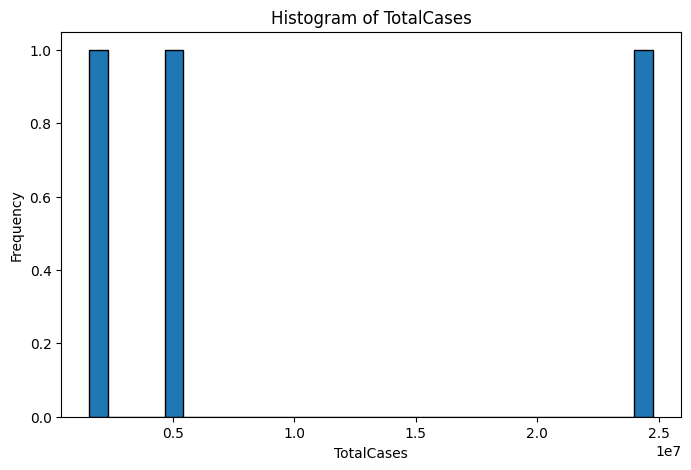

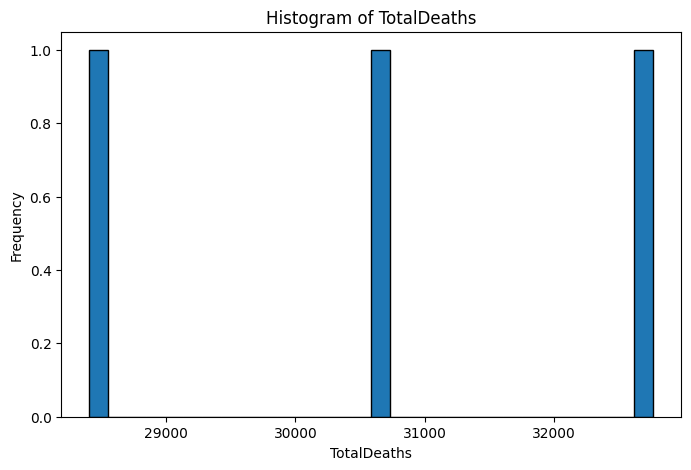

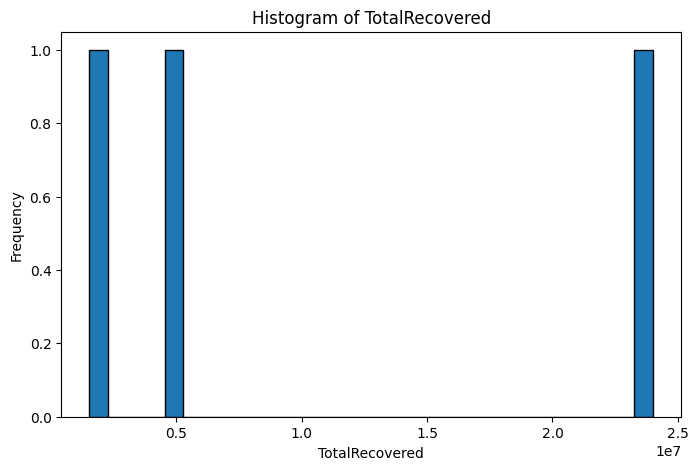

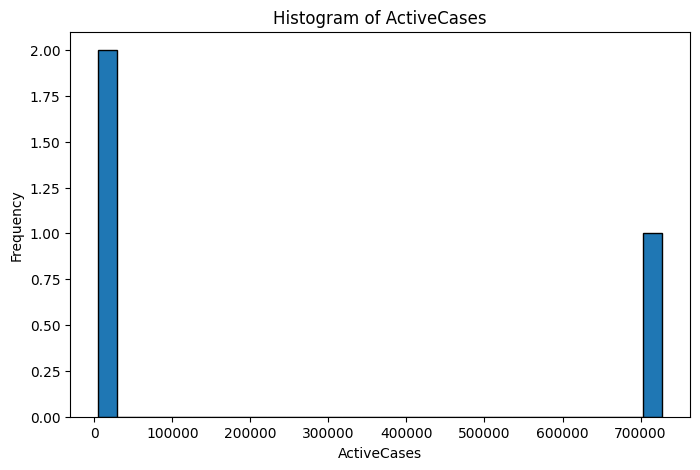

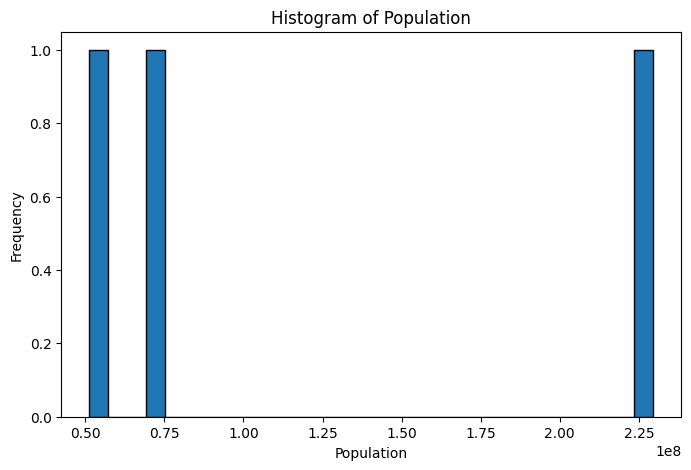

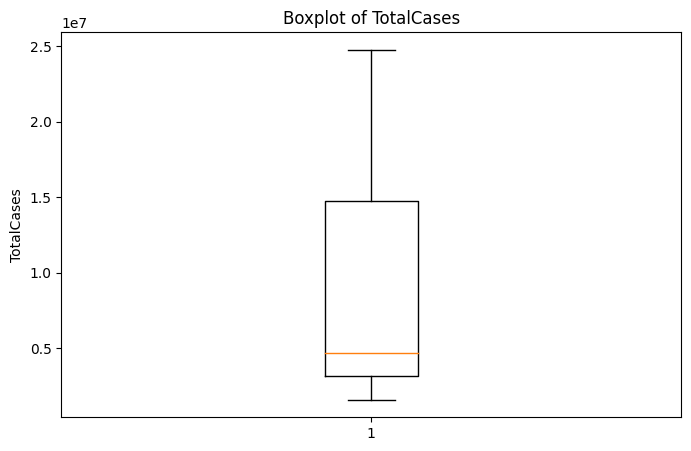

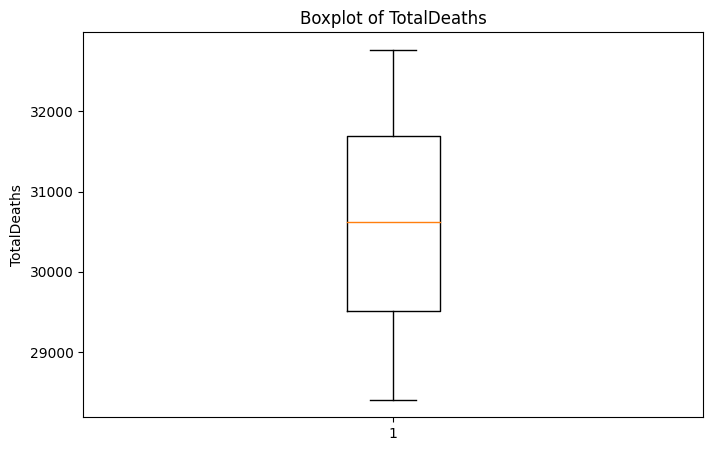

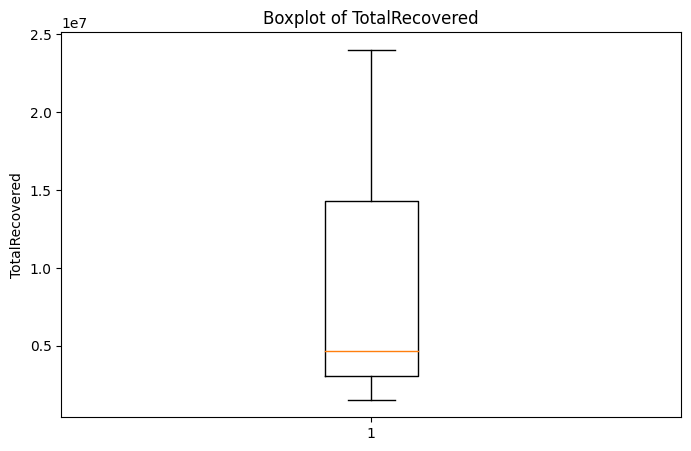

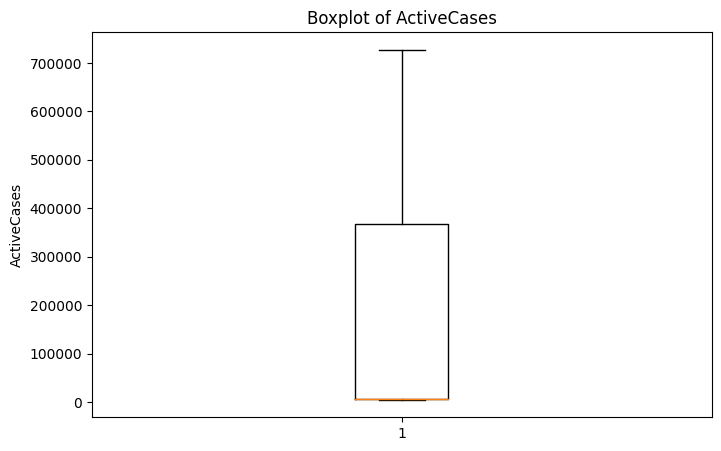

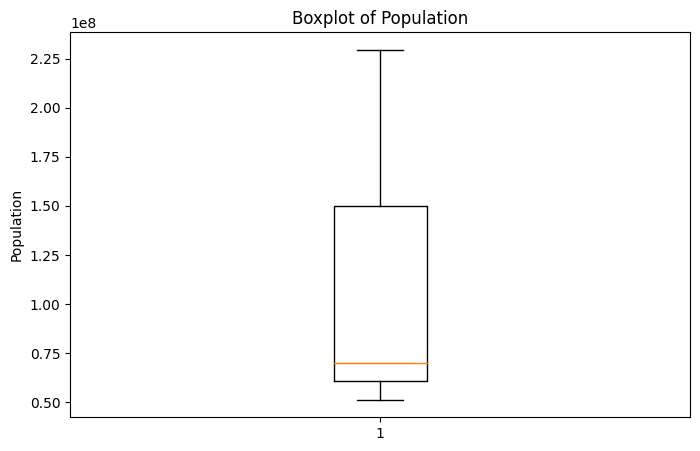

In [3]:
import matplotlib.pyplot as plt

# Here Defining the columns that we are interested in for visualization
columns_to_plot = ['TotalCases', 'TotalDeaths', 'TotalRecovered', 'ActiveCases', 'Population']

# Creating histograms for the selected columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.hist(covid_data_cleaned[column], bins=30, edgecolor='k')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Creating boxplots for the selected columns
for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    plt.boxplot(covid_data_cleaned[column].dropna())
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()


**Model Training and Evaluation**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the features and target variable
X = covid_data_cleaned[['TotalCases', 'TotalDeaths', 'TotalRecovered', 'Population']]
y = covid_data_cleaned['ActiveCases']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting Regressor
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

# To Predict on the test set
y_pred = gbr_model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

mae, mse


(721070.4427961241, 519942583474.19855)